# Customer Segmentation

### Machine Learning II Project

   - Bruno Moreira            | 20211574@novaims.unl.pt
   - Carolina Braziel Shaul   | 20211557@novaims.unl.pt
   - Madalena Dias Frango     | 20211522@novaims.unl.pt

## Table of Contents

<br>
[2. Preliminary Data Adjustments](#2. bullet)<br>
<br>
[3. Customer Segmentation - K-Means](#3.-bullet)<br>
<br>

<br>

---
<br>

<a class="anchor" id="1-bullet">     
    

### 1. Importing Data & Libraries 

</a>


In [1]:
#Basic Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix


#Plot Maps
import folium
from folium.plugins import HeatMap, MarkerCluster 

#Functions
import Functions

# Umap library
import umap

%load_ext autoreload
%autoreload 2

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")


# Matplotlib Options
plt.rcParams['figure.figsize'] = [16, 8]
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

In [2]:
individuals = pd.read_csv('clientes_preprocessed.csv')
transactions = pd.read_csv('Customer Basket Dataset.csv')
prod_mapping = pd.read_excel('Product Mapping Excel File.xlsx')

In [3]:
individuals.set_index('customer_id', inplace=True)

<br>

---
<br>

<a class="anchor" id="2.-bullet">     
    

### 2. Preliminary Data Adjustments

</a>

#### Joining Features

In [4]:
individuals['lifetime_spend_animal_protein'] = individuals[['lifetime_spend_fish', 'lifetime_spend_meat']].sum(axis=1)
individuals['lifetime_spend_technology'] = individuals[['lifetime_spend_videogames', 'lifetime_spend_electronics']].sum(axis=1)

In [5]:
corr_matrix = individuals.drop(['lifetime_spend_fish', 'lifetime_spend_meat', 'lifetime_spend_videogames', 'lifetime_spend_electronics'], axis = 1).corr()
Functions.get_high_correlations(corr_matrix, 0.66)

,Variable 1,Variable 2,Correlation
10,lifetime_total_distinct_products,lifetime_spend_animal_protein,0.932928
3,lifetime_spend_groceries,lifetime_total_distinct_products,0.926119
2,distinct_stores_visited,percentage_of_products_bought_promotion,0.923021
6,lifetime_spend_groceries,lifetime_spend_animal_protein,0.915666
5,lifetime_spend_groceries,total_lifetime_spend,0.913175
0,kids_home,minors_in_household,0.895671
11,total_lifetime_spend,lifetime_spend_animal_protein,0.872337
9,lifetime_total_distinct_products,total_lifetime_spend,0.855891
1,teens_home,minors_in_household,0.799848
7,lifetime_spend_nonalcohol_drinks,lifetime_spend_technology,0.787628


In [10]:
continuous = ['lifetime_spend_groceries', 'lifetime_spend_electronics', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction', 'total_lifetime_spend', 'age', 'birthday' ]

#Variaveis tais como 'lifetime_total_distinct_products', 'year_first_transaction', 
#  'age', 'birthday', estão a ser tratadas como continuas neste contexto dada a amplitude delas.

discrete = ['kids_home', 'teens_home', 'typical_hour', 'birthmonth',
       'number_complaints', 'distinct_stores_visited', 'minors_in_household', 'education']

binary = ['customer_gender', 'loyalty_card']

#### Data Scalling

In [11]:
scaler = MinMaxScaler()
individuals_num = individuals.drop(['customer_name', 'region'], axis=1)
scaled_data = scaler.fit_transform(individuals_num)
scaled_data = pd.DataFrame(scaled_data, index= individuals_num.index, columns=individuals_num.columns)

<br>

---
<br>

<a class="anchor" id="3.-bullet">     
    

### 3. Customer Segmentation - K-Means

</a>

> Selecting the columns to use to plot by

In [6]:
columns = ['lifetime_spend_groceries', 'lifetime_spend_electronics', 'lifetime_spend_vegetables',
 'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks', 'lifetime_spend_hygiene',
 'lifetime_spend_videogames', 'lifetime_total_distinct_products', 'percentage_of_products_bought_promotion',
 'year_first_transaction', 'total_lifetime_spend', 'age', 'kids_home', 'teens_home',
 'typical_hour', 'number_complaints','distinct_stores_visited', 'minors_in_household']

In [7]:
colors = ['#F29687','#5D64AC','#EFD56C','#B5699C','#569F6E']

<a class="anchor" id="3.1-bullet">     
    

#### 3.1. Finding Optimal Number of Clusters and Fitting the Model
</a>

This clustering solution is characterized by using the following variables for segmentation and forming 6 clusters.

> 'kids_home', 'teens_home', 'number_complaints',
 'distinct_stores_visited', 'lifetime_spend_groceries', 'typical_hour',
 'lifetime_spend_vegetables','lifetime_spend_nonalcohol_drinks','lifetime_spend_alcohol_drinks',
 'lifetime_spend_hygiene','lifetime_total_distinct_products','percentage_of_products_bought_promotion',
 'year_first_transaction','loyalty_card','total_lifetime_spend','age',
 'education','lifetime_spend_animal_protein','lifetime_spend_videogames', 'lifetime_spend_electronics'

In [8]:
fit_variables = ['kids_home', 'teens_home', 'number_complaints',
 'distinct_stores_visited', 'lifetime_spend_groceries', 'typical_hour',
 'lifetime_spend_vegetables','lifetime_spend_nonalcohol_drinks','lifetime_spend_alcohol_drinks',
 'lifetime_spend_hygiene','lifetime_total_distinct_products','percentage_of_products_bought_promotion',
 'year_first_transaction','loyalty_card','total_lifetime_spend','age',
 'education','lifetime_spend_animal_protein','lifetime_spend_videogames', 'lifetime_spend_electronics']

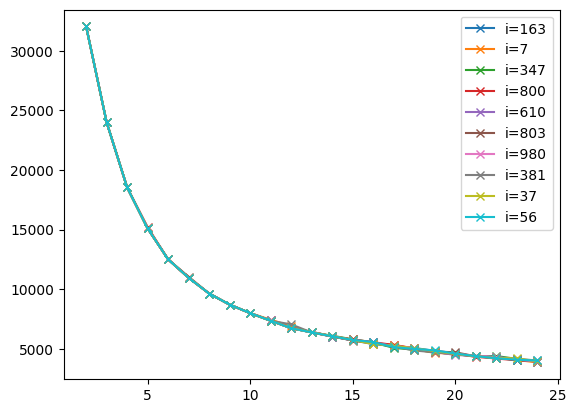

In [12]:
Functions.plot_inertia(scaled_data[fit_variables], 25, 10)

In [ ]:
kmeans_solZ = KMeans(n_clusters=6, random_state=0).fit(scaled_data[fit_variables])
individuals['cluster_kmeansZ'] =  kmeans_solZ.predict(scaled_data[fit_variables])

<a class="anchor" id="3.2.-bullet">     
    

#### 3.2. Assessing the Results
</a>